In [1]:
from sound_function import *
import numpy as np
import wave
import numpy as np
from scipy import signal
import scipy.io.wavfile as wavfile
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as nn

tf.random.set_seed(0)

In [3]:
# # Set the path to your data folder
# data_folder = "Datasets/yn_image"

# # Define the parameters for loading the dataset
# batch_size = 32
# image_size = (128, 342)  # Specify the desired image size
# # validation_split = 0.0  # Fraction of data to use for validation

# # Load the dataset from the folder
# train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#     data_folder,
#     color_mode='grayscale',
#     validation_split = None ,
#     seed=123,  # Set a seed for reproducibility
#     image_size=image_size,
#     batch_size=batch_size,
# )

# # validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
# #     data_folder,
# #     color_mode='grayscale',
# #     validation_split=validation_split,
# #     subset="validation",
# #     seed=123,
# #     image_size=image_size,
# #     batch_size=batch_size,
# # )





# # Print class names
# class_names = train_dataset.class_names
# print("Class names:", class_names)

Found 39 files belonging to 2 classes.


Class names: ['0', '1']


(32, 128, 342, 1)
tf.Tensor([0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1], shape=(32,), dtype=int32)


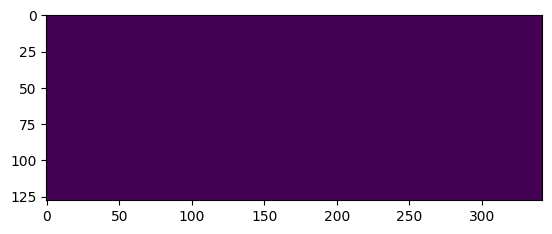

In [9]:
# for image,label in train_dataset.take(1):
#   plt.imshow(image[4])
#   print(image.shape)
#   print(label)

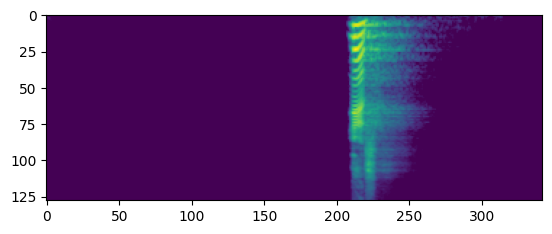

In [2]:
#turn it into image
PATH =  "Datasets/yn/"
PATH_To = "Datasets/yn_image/"
data_0 = []
data_1 = []
# new_length = 350000
All_Name_raw = os.listdir(PATH)
for name_class in All_Name_raw :
    name_in_class = os.listdir(PATH+"/"+str(name_class))
    for name in name_in_class :
        path_read = PATH+"/"+name_class + "/" + name
        output_file = PATH_To+"/"+name_class+"/"+name
        # main action start here
        if name_class == "0":
           data_0.append(process_wav_to_image(dir_wav = path_read, dir_tar = output_file[:-4]+".jpg",visual=True,output="get"))
        if name_class == "1":
           data_1.append(process_wav_to_image(dir_wav = path_read, dir_tar = output_file[:-4]+".jpg",visual=True,output="get"))
        

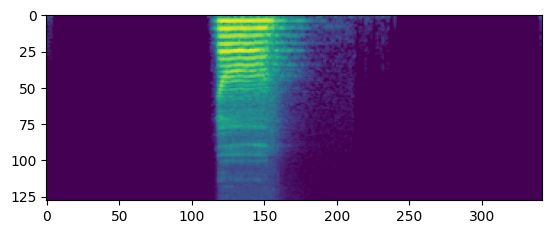

In [20]:
plt.imshow(data_0[27])

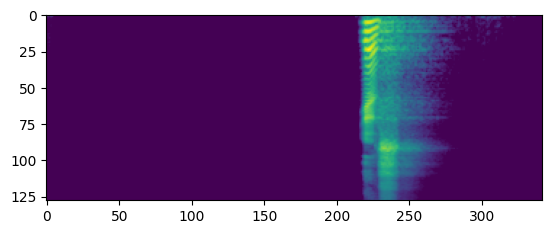

In [21]:
plt.imshow(data_1[27])

In [22]:
#create dataset and label list
data_list = []
label_list = []
for i in data_0:
    data_list.append(i)
    label_list.append(0)
for i in data_1:
    data_list.append(i)
    label_list.append(1)

In [23]:
import tensorflow as tf

# Sample data and labels as lists
# data_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# label_list = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # Corresponding labels

# Convert data and labels to TensorFlow datasets
data_dataset = tf.data.Dataset.from_tensor_slices(data_list)
label_dataset = tf.data.Dataset.from_tensor_slices(label_list)

# Combine data and labels into a single dataset
dataset = tf.data.Dataset.zip((data_dataset, label_dataset))

dataset = dataset.shuffle(len(data_list)+len(label_list)).batch(5)


(5, 128, 342, 1)
tf.Tensor([0 1 0 1 1], shape=(5,), dtype=int32)


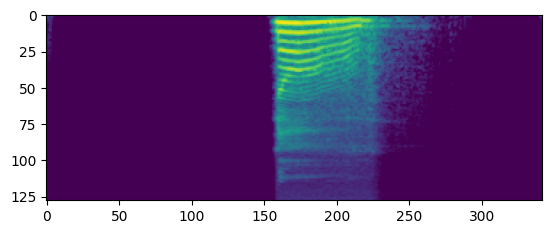

In [24]:
for image,label in dataset.take(1):
  plt.imshow(image[0])
  print(image.shape)
  print(label)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten
import tensorflow.keras.layers as nn
model = Sequential([
    Conv2D(16, (3,4), activation='relu', input_shape=(128, 342,1)),
    nn.MaxPooling2D(pool_size=(2,2)),
    Conv2D(16, (3,3), activation='relu'),
    nn.MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 339, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 169, 16)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 167, 16)       2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 83, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 39840)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

In [29]:
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [30]:
model.fit(
    dataset,
    epochs = 30,
    batch_size = 5)

Epoch 1/30


17/17 [==============================] - 2s 52ms/step - loss: 2.1701 - accuracy: 0.4444
Epoch 2/30
17/17 [==============================] - 1s 48ms/step - loss: 1.4475 - accuracy: 0.4568
Epoch 3/30
17/17 [==============================] - 1s 45ms/step - loss: 0.7931 - accuracy: 0.5556
Epoch 4/30
17/17 [==============================] - 1s 46ms/step - loss: 0.8399 - accuracy: 0.5432
Epoch 5/30
17/17 [==============================] - 1s 46ms/step - loss: 0.8442 - accuracy: 0.6173
Epoch 6/30
17/17 [==============================] - 1s 47ms/step - loss: 0.6813 - accuracy: 0.6420
Epoch 7/30
17/17 [==============================] - 1s 49ms/step - loss: 0.7905 - accuracy: 0.5679
Epoch 8/30
17/17 [==============================] - 1s 47ms/step - loss: 0.6228 - accuracy: 0.7160
Epoch 9/30
17/17 [==============================] - 1s 47ms/step - loss: 0.7862 - accuracy: 0.6049
Epoch 10/30
17/17 [==============================] - 1s 49ms/step - loss: 0.8142 - accuracy: 0.5432
Epoch 11/30
17/17 [=